In [1]:
import pandas as pd     
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import QED, Descriptors, Crippen
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
# now you can import sascore!
import sascorer
from rdkit.Chem import QED, Descriptors, Crippen

In [2]:
df = pd.read_csv('../data/DOCKSTRING/dockstring-dataset.tsv', sep='\t')

In [3]:
df.dropna(inplace=True)

In [4]:
protein_ids = ['PPARD', 'ABL1', 'ADAM17', 'ADRB1', 'ADRB2',
       'AKT2', 'MAOB', 'CASP3', 'DHFR', 'ESR2', 'PTK2', 'FGFR1', 'HMGCR',
       'HSP90AA1', 'KIT', 'MAPKAPK2', 'MAP2K1', 'NOS1', 'PARP1', 'PDE5A',
       'PGR', 'PTPN1', 'ROCK1', 'AKT1', 'AR', 'CDK2', 'CSF1R', 'ESR1', 'NR3C1',
       'IGF1R', 'JAK2', 'LCK', 'MET', 'MMP13', 'PTGS2', 'PPARA', 'PPARG',
       'REN', 'ADORA2A', 'ACHE', 'BACE1', 'CA2', 'CYP2C9', 'CYP3A4', 'HSD11B1',
       'DPP4', 'DRD2', 'DRD3', 'EGFR', 'F10', 'GBA', 'MAPK1', 'MAPK14', 'PLK1',
       'SRC', 'THRB', 'F2', 'KDR']

In [5]:
newdata = {}
from matplotlib import rcParams

sns.set_style("white")
protein_ids = ['LCK']
for key in protein_ids:
    newdata[key] = list(df[key])
    # break

In [ ]:
# newdata 

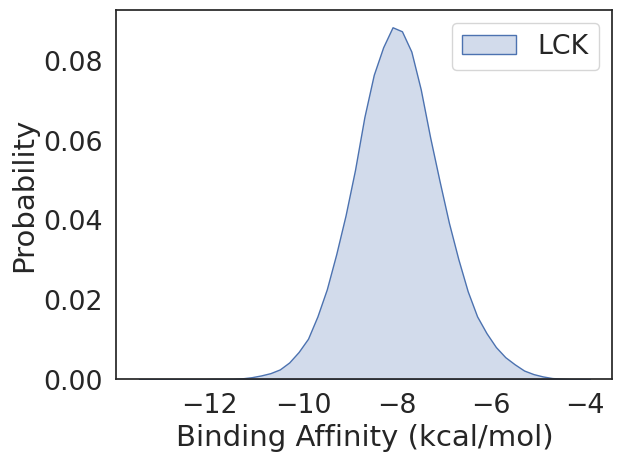

In [ ]:
sns.set(font_scale=1.75)  
sns.set_style("white")
sns.histplot(newdata,  stat='probability', element='poly', fill=True, common_norm=True, binwidth=0.2)
plt.xlabel('Binding Affinity (kcal/mol)')
plt.savefig('IMAGES/binding_affinity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

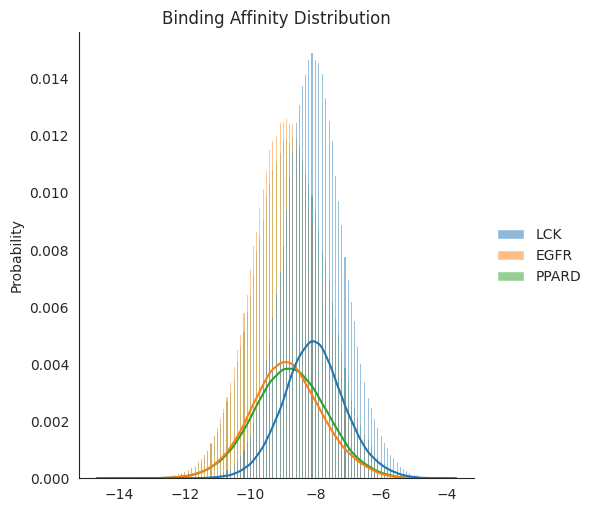

In [10]:
sns.displot(newdata,  kde=True, stat='probability')
plt.title('Binding Affinity Distribution')
# plt.savefig('IMAGES/binding_affinity_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

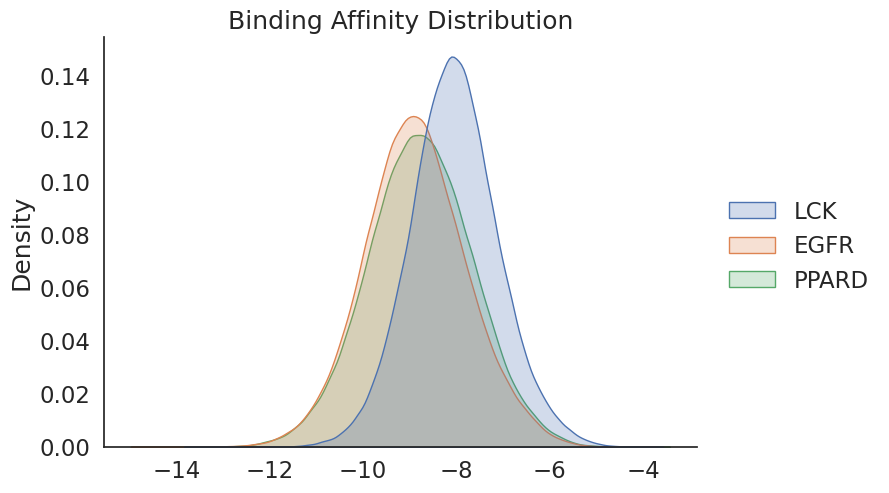

In [30]:
sns.displot(newdata, kind="kde", fill=True, aspect=1.5, height=5)
plt.title('Binding Affinity Distribution')
plt.savefig('IMAGES/binding_affinity_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

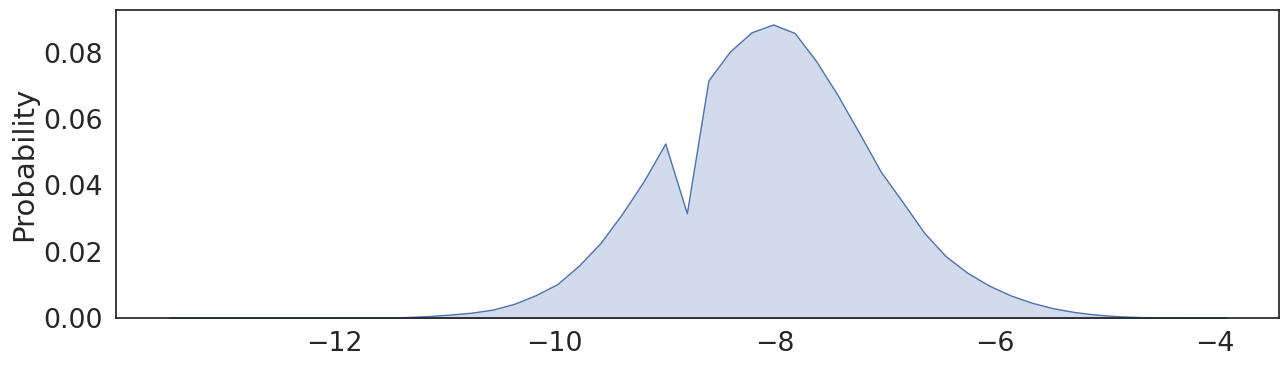

In [30]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(15,4)})

sns.set(font_scale=1.75)  
sns.set_style("white")
sns.histplot(newdata,  stat='probability', element='poly', fill=True, common_norm=True, bins=50)
plt.legend('', frameon=False)
# plt.savefig('IMAGES/dockstring_'+ key +'_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

In [10]:
from tqdm.auto import tqdm

smiles = list(df['smiles'].values)

qeds = []
tpsas = []
logps = []
sas = []
molwts = []
rdkitsmiles = []
smiles_len = []
for smi in tqdm(smiles):
    m = Chem.MolFromSmiles(smi)
    qeds.append(QED.qed(m))
    tpsas.append(Descriptors.TPSA(m))
    logps.append(Crippen.MolLogP(m))
    rdkitsmiles.append(Chem.MolToSmiles(m))
    sas.append(sascorer.calculateScore(m))
    molwts.append(Descriptors.MolWt(m))
    smiles_len.append(len(smi))

  0%|          | 0/260060 [00:00<?, ?it/s]

In [11]:
# smiles_len = []
# for smi in tqdm(smiles):
#     smiles_len.append(len(smi))

In [12]:
tempdf = pd.DataFrame()
tempdf['QED'] = qeds
tempdf['TPSA'] = tpsas
tempdf['LogP'] = logps
tempdf['SAS'] = sas
tempdf['MolWt'] = molwts
tempdf['SMILES length'] = smiles_len

key = 'SMILES length'
newdata = pd.DataFrame()
newdata[key] = tempdf[key]

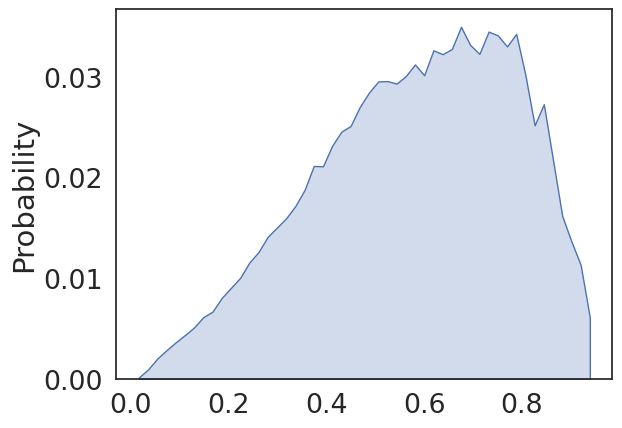

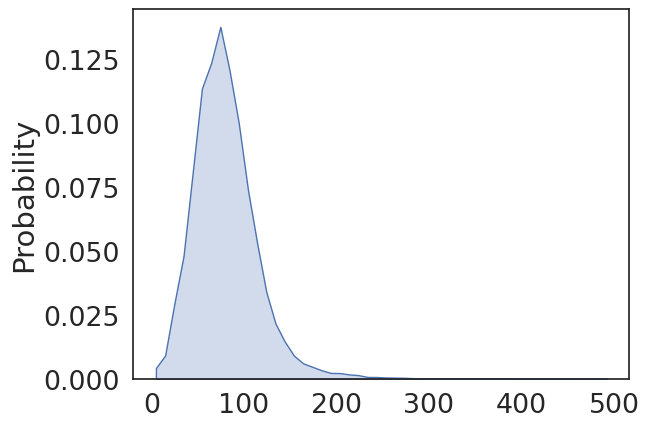

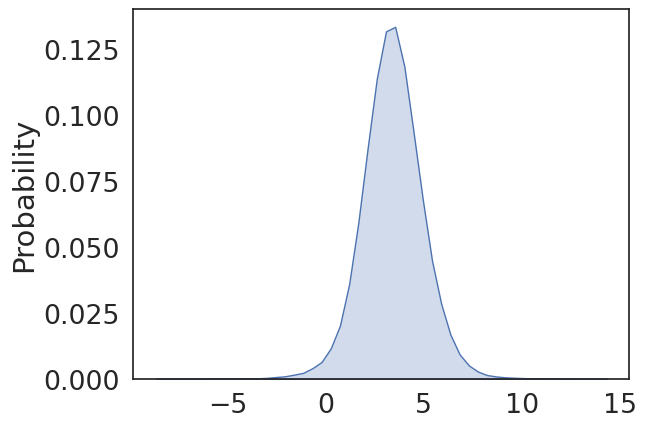

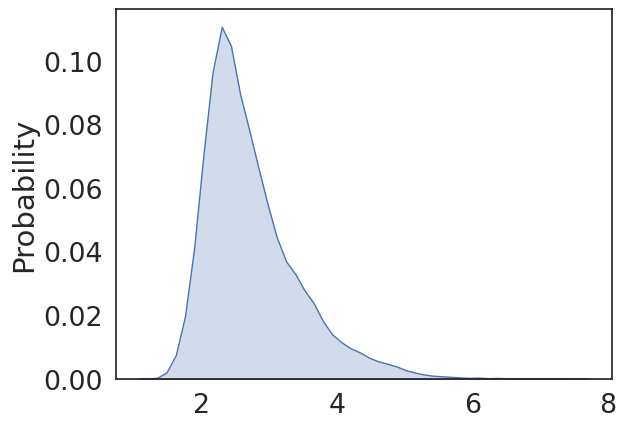

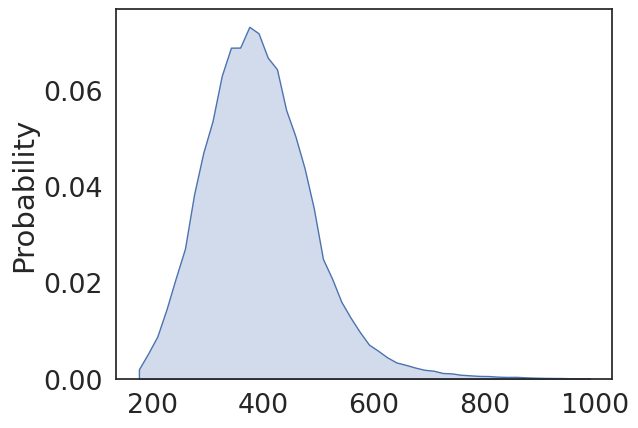

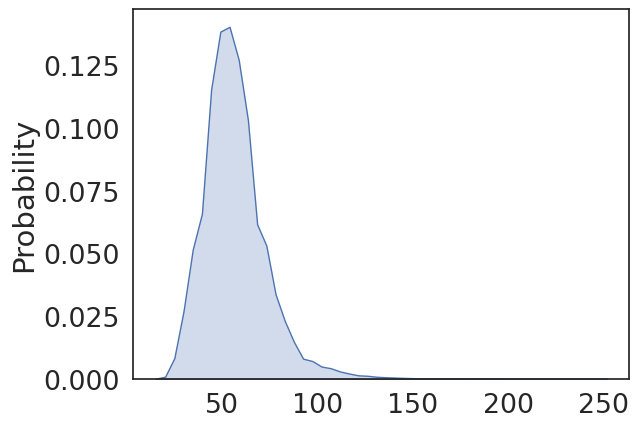

In [31]:
for key in ['QED', 'TPSA', 'LogP', 'SAS', 'MolWt', 'SMILES length']:
    newdata = pd.DataFrame()
    newdata[key] = tempdf[key]
    sns.set(font_scale=1.75)  
    sns.set_style("white")
    sns.histplot(newdata,  stat='probability', element='poly', fill=True, common_norm=True, bins=50)
    # plt.title(key + ' Distribution')
    plt.legend('', frameon=False)
    # plt.xlabel(key)
    plt.savefig('IMAGES/dockstring_'+ key +'_distribution.png', dpi=100, bbox_inches='tight')
    plt.show()

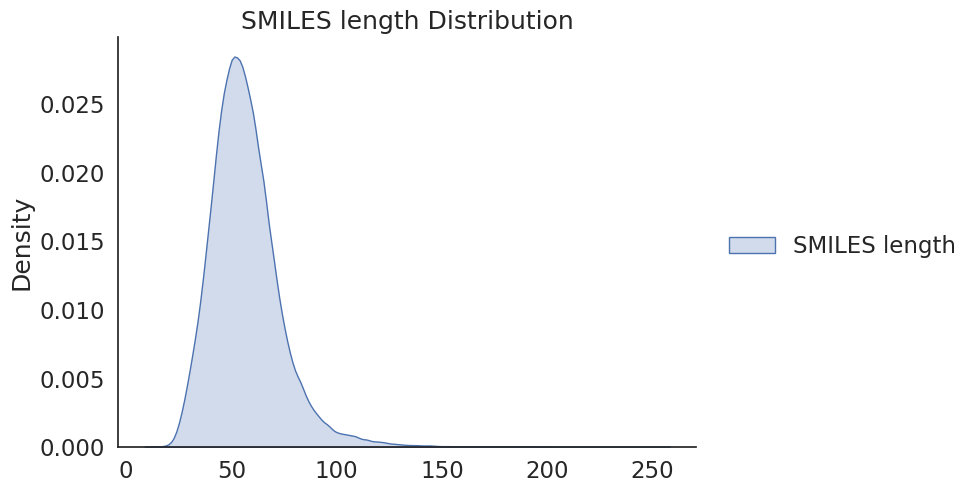

In [28]:
sns.set(font_scale=1.5)  
sns.set_style("white")
sns.displot(newdata, kind="kde", fill=True, aspect=1.5, height=5, common_norm=True)
plt.title(key + ' Distribution')
plt.savefig('IMAGES/dockstring_'+ key +'_distribution.png', dpi=100, bbox_inches='tight')
plt.show()